# #1. Importing libraries, dataframe and creating pathname shortcut

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
pathname=r'/Users/alejandrocisneros/Desktop/Data Analysis Coursework/Data Immersion/Achievement 4/02-2024 Instacart Basket Analysis'

In [3]:
df=pd.read_pickle(os.path.join(pathname, '2. Data', 'Prepared Data', 'final_instacart.pkl'))

# #2. Completed in another file

# #3. Provide the Instacart senior stakeholders with descriptive findings about sales

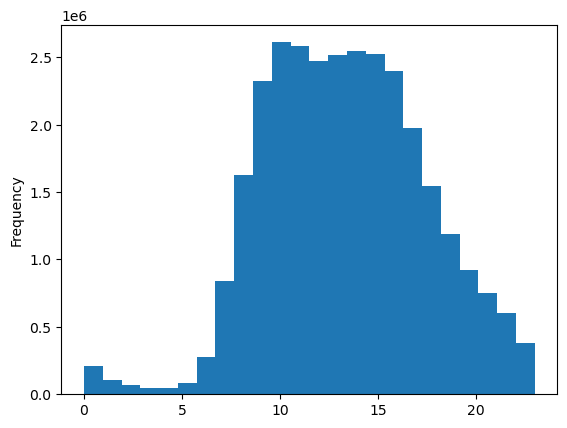

In [4]:
#To do this, we will create a histogram of the orders_hour_of_day column. We will do this in order to get a visual
#understanding of purchases across the day for Instacart users.
hourly_activity_hist=df['order_hour_of_day'].plot.hist(bins=24)

### As would be logical, orders start rapidly increasing from 5 am until about 9 am, where Instacart then experencies a relatively stable peak of around 2.5m orders per hour that lasts until about 4 pm. At about this time, sales start to gradually decrease as activity starts declining and reach a floor of close to 0 at around 3 and 4 am. This completes the daily sales cycle for Instacart

# #4. Find the distribution of orders among customers in terms of loyalty and explain results

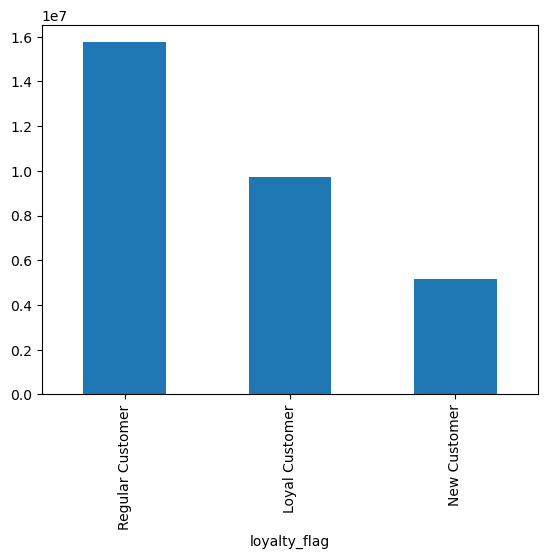

In [5]:
orders_by_loyalty_status=df['loyalty_flag'].value_counts().plot.bar()

# #5. Check whether there’s a difference in expenditure depending on the hour of the day

### #In order to optimize memory usage, we will determine our goal using a sample population that includes 20% of the orders we are reviewing in the entire dataframe. We will write the code to ensure that the sample is indeed random and is representative of the entire order population.

In [6]:
#Using numpy, we create a random but reproducible pattern with the random.seed() function
#Then, you create a new list 'dev' and apply the np.random.rand() func which creates a uniformly distributed 
#randomized values, and each number is assigned a Boolean True or False. This list is the length of the entire df 
#dataframe through the len() function.
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.8

In [7]:
#Now, we will create the larger sample based off the list above. big=80%
big=df[dev]

In [8]:
#Now, we create the smaller sample(which we will be using). small=20%
small=df[~dev]

In [9]:
#Testing they worked correctly
len(df)

30629741

In [10]:
len(small)+len(big)

30629741

## Success! Now, we create our line chart with our sns.lineplot function

/Users/alejandrocisneros/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alejandrocisneros/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


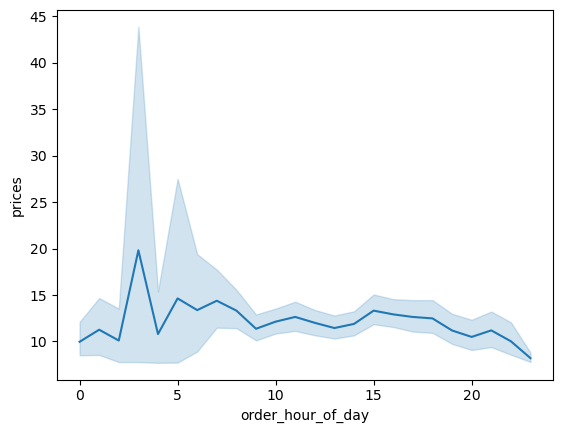

In [11]:
#We create a line chart with the 'prices' & 'order_hour_of_day' columns
expenditure_by_hour=sns.lineplot(data=small, x='order_hour_of_day', y='prices')

#### #Given that we used the same approach as the prior exercise, we are going to trust that the sample we created is accurate and therefore this line chart is also accurate. The results are very interesting, as there appears to be a spike in terms of purchased products price tag at about 3 am. Would need to dive deeper into that to determine why the average purchase price is that mich higher at that hour of the day.

# #6. Determining the importance of the demographics

/Users/alejandrocisneros/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/alejandrocisneros/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


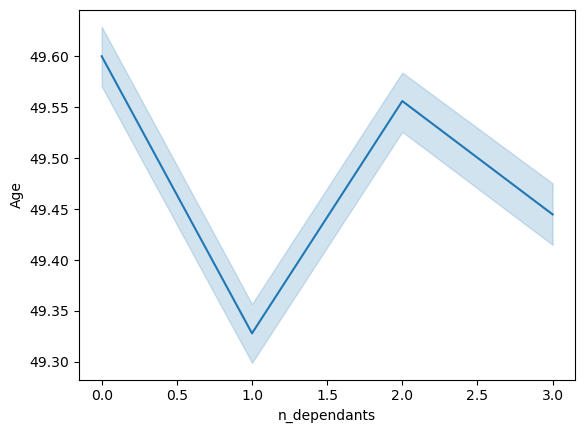

In [12]:
#To determine the importance of some of the customer information, we are going to examine the relationship between
#a customers age and their familial status. 
family=sns.lineplot(data=small, x='n_dependants', y='Age')

### #Hard to interpret this line chart. It seems that most of the customers who have dependants are around 49 years old, but not sure why that is the case.

In [13]:
#Rresults look a little strange so I am going to examine the age column 
small['Age'].describe()

count    6.126411e+06
mean     4.948233e+01
std      1.847685e+01
min      1.800000e+01
25%      3.400000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

In [14]:
#Everything seems right.

# #7. Determining relationship between consumers age and income

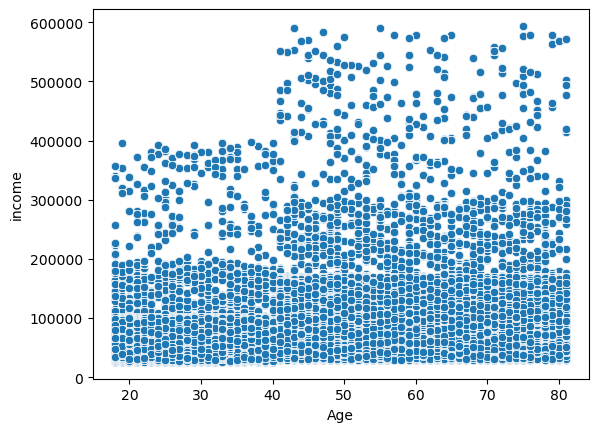

In [15]:
#We will use the sns.scatterplot() function to see if we can spot any relationship between these two variables in
#the dataframe.
age_income=sns.scatterplot(data=small, x='Age', y='income')

### This scatterplot shows us that there is close to relationship between these two factors. Income levels are all over the place, of course with a heavy concentration at lower income levels, but there is no discernible pattern to be spotted here. 

# #8. Exporting visualizations

In [16]:
#Exporting the histogram
hourly_activity_hist.figure.savefig(os.path.join(pathname, '4. Analysis','Visualizations', 'hourly_activity_distribution.png'))

In [17]:
#Exporting the bar chart
orders_by_loyalty_status.figure.savefig(os.path.join(pathname, '4. Analysis','Visualizations', 'orders_by_loyalty_status.png'))

In [18]:
#Exporting the line charts
expenditure_by_hour.figure.savefig(os.path.join(pathname, '4. Analysis','Visualizations', 'expenditure_by_hour.png'))
family.figure.savefig(os.path.join(pathname, '4. Analysis','Visualizations', 'family.png'))

In [19]:
#Exporting the scatterplot
age_income.figure.savefig(os.path.join(pathname, '4. Analysis','Visualizations', 'age_income.png'))